### 1.	Load Dataset from Boston Housing Agency into a DataFrame. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv("boston_housing.csv")


In [2]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 2.	For the "Median value of owner-occupied homes" provide a boxplot

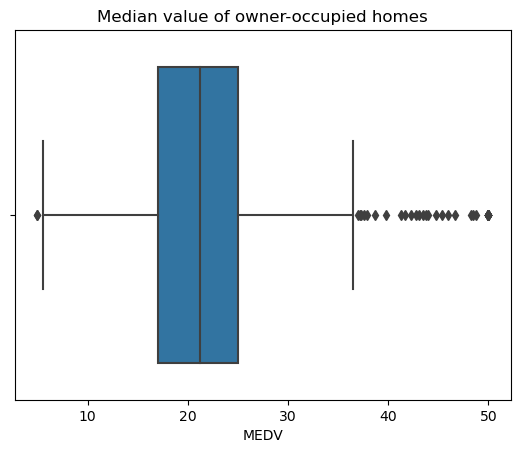

In [4]:
sns.boxplot(x="MEDV", data=df)
plt.title("Median value of owner-occupied homes")
plt.show()

### 3.	Provide a histogram for the “Charles river variable”.

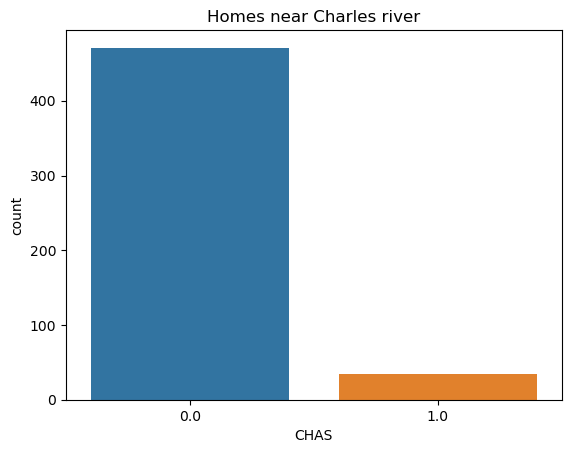

In [5]:
sns.countplot(x="CHAS", data=df)
plt.title("Homes near Charles river")
plt.show()

### 4.	Provide a boxplot for the MEDV variable vs the AGE variable.

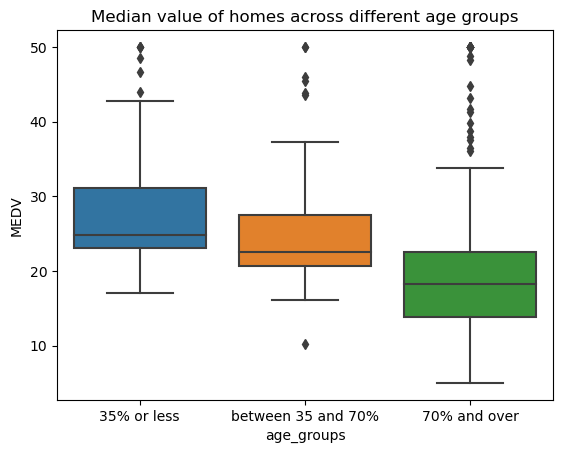

In [6]:
# Discretize the age variable into three groups of 35% or less, between 35 and 70% and 70% and over
# I have considered the age in proportions
age_labels=["35% or less", "between 35 and 70%", "70% and over"]
age_bins=[0,35,70,100]

df["age_groups"]=pd.cut(df["AGE"], bins=age_bins, labels=age_labels)

sns.boxplot(x="age_groups", y="MEDV", data=df)
plt.title("Median value of homes across different age groups")
plt.show()

### 5.	Provide a scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 

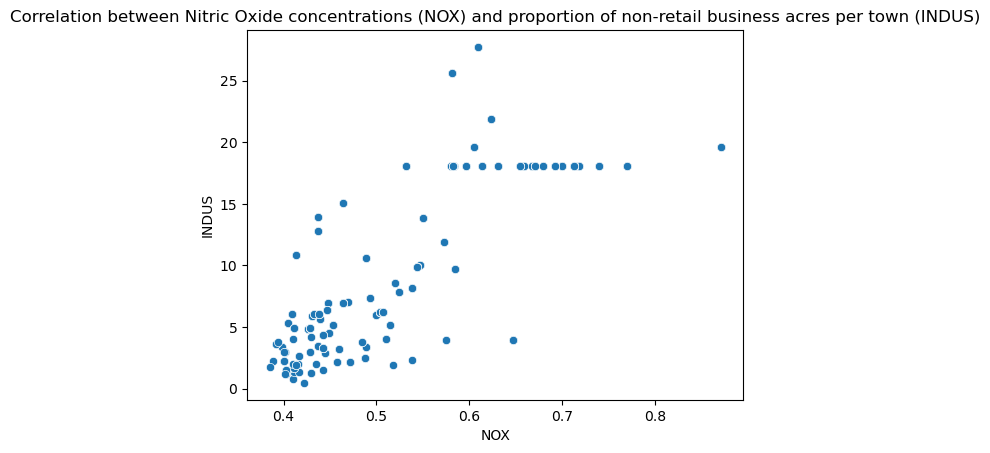

In [7]:
#Additional task - What can you say about the relationship?
sns.scatterplot(x="NOX", y="INDUS", data=df)
plt.title("Correlation between Nitric Oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)")
plt.show()


##### Interpretation - There appears to be a positive correlation between INDUS and NOX variables. The relationship is linear.

### 6.	Create a histogram for the pupil to teacher ratio variable (PTRATIO)

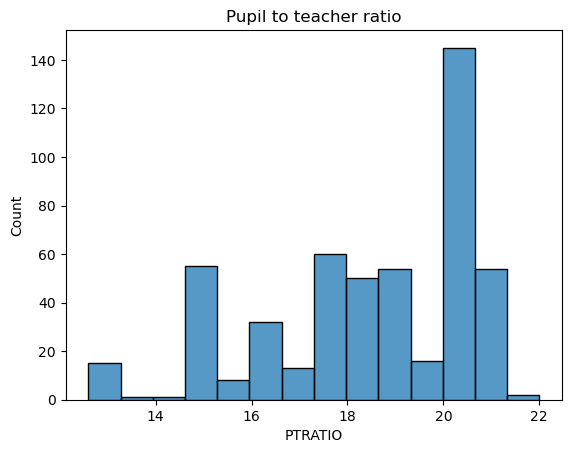

In [8]:
sns.histplot(x="PTRATIO", data=df)
plt.title("Pupil to teacher ratio")
plt.show()

### 7.	Is there a significant difference in median value of houses bounded by the Charles river or not? (CHAS) (T-test for independent samples) 

In [10]:
# To determine whether there is a significant difference in the median value of houses that are 
# bounded by the Charles river (CHAS=1) compared to those that are not bounded by the river (CHAS=0).

# H0 - There's no significant difference in median value of houses with CHAS=1 & CHAS=2

not_river=df[df["CHAS"]==0]
yes_river=df[df["CHAS"]==1]

t_stat, p_value =stats.ttest_ind(not_river["MEDV"], yes_river["MEDV"])

print("t-statistic="+str(t_stat))
print("P value="+str(p_value))

t-statistic=-3.996437466090509
P value=7.390623170519905e-05


In [11]:
if p_value < 0.05:
    print("There is significant difference in median house values bounded by Charles river and not")
else:
    print("There is no significant difference")

There is significant difference in median house values bounded by Charles river and not


### 8.	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
# we have already created an age group column in task 4 which labels each entry <35, 35-70 and 70+

#H0 - There is no difference in house values for different age groups

low_age=df[df['age_groups'] == '35% or less']
mid_age=df[df['age_groups'] == 'between 35 and 70%']
high_age=df[df['age_groups'] == '70% and over']

f_stat, p_val=stats.f_oneway(low_age["MEDV"], mid_age["MEDV"], high_age["MEDV"])

print("f-statistic="+str(f_stat))
print("P value="+str(p_val))

f-statistic=36.40764999196599
P value=1.7105011022702984e-15


In [13]:
if p_value < 0.05:
    print("There is a significant difference in median house values for different age groups")
else:
    print("There is no significant difference")

There is a significant difference in median house values for different age groups
